## 1. Import Data

In [1]:
%matplotlib inline
import pandas as pd

df_raw = pd.read_csv('http://neueda.conygre.com/pydata/ml_fc/health_insurance_trimmed.csv', index_col=0)
df_raw

age  gender    bmi  children smoker     region     charges
1      18    male  33.77         1     no  southeast   1725.5523
2      28    male  33.00         3     no  southeast   4449.4620
4      32    male  28.88         0     no  northwest   3866.8552
5      31  female  25.74         0     no  southeast   3756.6216
6      46  female  33.44         1     no  southeast   8240.5896
...   ...     ...    ...       ...    ...        ...         ...
1332   52  female  44.70         3     no  southwest  11411.6850
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450

[980 rows x 7 columns]

## 2. Analyse/Clean/Shape Data

For this example we are suggesting that age can be a predictor of health charges.

We would bring in further "independent" variables to the same training set e.g. gender, smoking etc..

In [3]:
# create a new DataFrame with just the age and charges columns

df = df_raw[["age", "charges"]]

In [4]:
import pandas.plotting

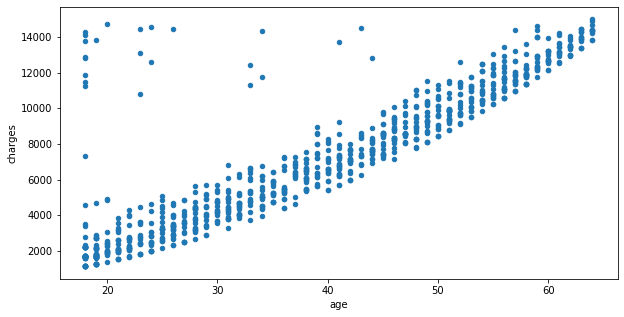

In [9]:
# add a scatter_matrix for the age/charges dataframe (import from pandas.plotting)
df.plot(x="age", y="charges", kind="scatter", figsize=(10,5))

In [12]:
# check for nulls in the DataFrame
df.isnull().sum()

age        0
charges    0
dtype: int64

## 3. Independent / Dependant variables

In [15]:
df.drop?

In [19]:
# create a new DataFrame called X with just the age column
df_X = df.drop(columns=["charges"])

# create a Series called y with just the charges column
df_y = df["charges"]

## 4. Train/Test Split

In [20]:
from sklearn.model_selection import train_test_split

# use train_test_split to create X_train, X_test, y_train and y_test
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

## 5. Select & Train Model

In [43]:
# create a LinearRegression object from sklearn.linear_model
# pass X_train and y_train to it's 'fit' function

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

## 6. Validation

In [44]:
# validate with r2_score form sklearn.metrics
from sklearn.metrics import r2_score

r2_lr = r2_score(y_test, y_pred)
print("Lin Reg R2: {0:.5f}".format(r2_lr))

Lin Reg R2: 0.79970


## 7. (Optional) Visualise Results

In [25]:
import matplotlib.pyplot as plt

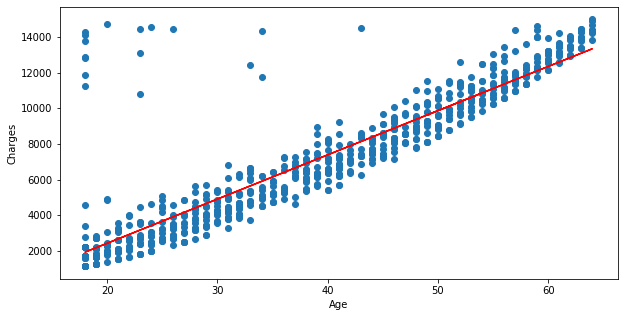

In [30]:
# scatter plot of the training data
# line plot on the same axes of the predictions from the model

plt.figure(figsize=(10,5))
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, c="r")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

In [32]:
import numpy as np

In [33]:
# prediction - e.g. what does the model predict would be the yearly charges for a person aged 44
test = np.array([44]).reshape(1,-1)
lr.predict(test)

array([8376.31196536])

## Optional - compare with other models
Try Repeating training and validation using another similar model:
* ```from sklearn.linear_model import Ridge``` : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

Is this more or less accurate than the LinearRegression model?

In [34]:
from sklearn.linear_model import Ridge

In [49]:
r = Ridge()
r.fit(X_train, y_train)
y_pred = r.predict(X_test)

In [50]:
r2_r = r2_score(y_test, y_pred)

In [51]:
print("Ridge R2: {0:.5f}".format(r2_r))

Ridge R2: 0.79970


You could similarly try using the more complex probabilistic model ```from sklearn.linear_model import BayesianRidge```

https://scikit-learn.org/stable/modules/linear_model.html#bayesian-regression

Note that this model has some optional parameters - parameters set on the model when it's created are known as "hyperparameters" i.e. these will not be adjusted during the fitting process.

In [45]:
from sklearn.linear_model import BayesianRidge

In [46]:
br = BayesianRidge()
br.fit(X_train, y_train)
y_pred = br.predict(X_test)

In [47]:
r2_br = r2_score(y_test, y_pred)

In [48]:
print("Bayesian Ridge R2: {0:.5f}".format(r2_br))

Bayesian Ridge R2: 0.79970
